## Adult Income - Linear Regression

In [ ]:
! pip install pandas
! pip install numpy
! pip install sklearn 
! pip install matplotlib
! pip install seaborn

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,  mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(path,
                names = ["fixed acidity", "volatile acidity","citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"],
                sep=";")
                


In [3]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [4]:
df.shape

(1600, 12)

In [5]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
743,6.5,0.615,0,1.9,0.065,9,18,0.9972,3.46,0.65,9.2,5
369,10.3,0.34,0.52,2.8,0.159,15,75,0.9998,3.18,0.64,9.4,5
426,6.6,0.84,0.03,2.3,0.059,32,48,0.9952,3.52,0.56,12.3,7
1295,8.2,0.635,0.1,2.1,0.073,25,60,0.99638,3.29,0.75,10.9,6
1434,6.1,0.4,0.16,1.8,0.069,11,25,0.9955,3.42,0.74,10.1,7
246,7.3,0.66,0,2,0.084,6,23,0.9983,3.61,0.96,9.9,6
606,8.3,0.6,0.13,2.6,0.085,6,24,0.9984,3.31,0.59,9.2,6
572,6.2,0.36,0.24,2.2,0.095,19,42,0.9946,3.57,0.57,11.7,6
1464,6.9,0.63,0.01,2.4,0.076,14,39,0.99522,3.34,0.53,10.8,6
768,7.5,0.6,0.32,2.7,0.103,13,98,0.99938,3.45,0.62,9.5,5


### Exploratory Data Analysis

In [6]:
df['fixed acidity'].describe()

count     1600
unique      97
top        7.2
freq        67
Name: fixed acidity, dtype: object

In [7]:
df['volatile acidity'].describe()

count     1600
unique     144
top        0.6
freq        47
Name: volatile acidity, dtype: object

In [8]:
df.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [9]:
df_columns = df.columns

In [10]:
df[df_columns] = df[df_columns].apply(pd.to_numeric, errors='coerce')

In [11]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [12]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
279,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8.0
483,10.6,0.360,0.59,2.2,0.152,6.0,18.0,0.99860,3.04,1.05,9.4,5.0
175,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5.0
614,8.2,0.390,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5.0
1460,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7.0
1185,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5.0
973,10.1,0.380,0.50,2.4,0.104,6.0,13.0,0.99643,3.22,0.65,11.6,7.0
148,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5.0
462,8.3,0.615,0.22,2.6,0.087,6.0,19.0,0.99820,3.26,0.61,9.3,5.0
1251,7.1,0.600,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9,6.0


In [24]:
df.dropna(axis=0,how='any',inplace=True)

In [25]:
# Check for null values
print(df.isnull().sum())

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [26]:
features = ["fixed acidity", "volatile acidity","citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

In [27]:
# Initiate the scaler (create an instance of the sklearn class
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [28]:
# Fit the scaler to our data
scaled_results = std_scaler.fit_transform(df[features])
scaled_results[:2]

array([[-0.2988107 ,  1.96799868, -1.3927516 ,  0.04312181,  0.22365688,
         0.87213298,  0.62395884,  0.02860397, -0.71927581,  0.12856122,
        -0.58536385],
       [-0.2988107 ,  1.29763706, -1.18728948, -0.16966868,  0.09617206,
        -0.08394063,  0.22874813,  0.13458389, -0.33043862, -0.04844122,
        -0.58536385]])

In [29]:
# convert those results into a dataframe
scaled_df = pd.DataFrame(scaled_results, columns=features)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.298811,1.967999,-1.392752,0.043122,0.223657,0.872133,0.623959,0.028604,-0.719276,0.128561,-0.585364
1,-0.298811,1.297637,-1.187289,-0.169669,0.096172,-0.083941,0.228748,0.134584,-0.330439,-0.048441,-0.585364
2,1.654152,-1.383809,1.483718,-0.453389,-0.265035,0.107274,0.411153,0.664484,-0.978501,-0.461447,-0.585364
3,-0.528571,0.962456,-1.392752,-0.453389,-0.243787,-0.466370,-0.379268,0.558504,1.289716,-0.579449,-0.960824
4,-0.528571,0.739002,-1.392752,-0.524319,-0.265035,-0.275155,-0.196863,0.558504,1.289716,-0.579449,-0.960824


In [30]:
#Drop original columns and merge scaled df
df = df.drop(features, axis=1)
df = pd.concat([df, scaled_df], axis=1)
df.sample(100)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
249,6.0,1.424392,-1.160356,0.867332,-0.666180,-0.520005,0.011667,-0.288066,0.929433,-0.589663,0.718569,-0.397634
424,7.0,-0.988092,1.744545,-1.238655,-0.169669,-0.604994,1.541385,0.046343,-0.819235,1.354523,-0.579449,1.761261
1374,5.0,-0.643451,0.180368,-0.057248,-0.382459,-0.095055,-0.275155,1.627186,-0.469502,-0.330439,-0.815452,-0.491499
929,5.0,-0.988092,0.459685,-1.341386,-0.453389,-0.158798,-0.753192,-0.652876,0.378338,2.456228,0.423565,0.071691
1021,6.0,-0.758331,-0.098950,-0.930462,-0.311529,-0.541252,-1.135622,-1.139289,-0.480100,0.252817,-0.697450,0.071691
...,...,...,...,...,...,...,...,...,...,...,...,...
839,7.0,1.596712,-0.601721,1.021428,0.078587,-0.052560,-0.657585,-0.379268,0.325348,-0.460051,0.659569,1.573531
1196,6.0,-0.356251,0.236231,-0.314075,-0.737110,-0.392520,-1.135622,-1.139289,-1.147773,-0.978501,-0.697450,-0.585364
1321,5.0,0.447911,-1.048629,0.764601,-0.524319,-0.626242,-0.657585,-0.865682,-1.497507,-0.848888,-0.638449,0.916476
544,6.0,0.447911,-0.322404,1.124159,0.043122,0.138667,2.115029,1.809591,0.770463,-1.496950,-0.402446,-1.242419


In [31]:
df.dropna(axis=0,how='any',inplace=True)

### Model Building

In [32]:
# Declare features and target
features = ["fixed acidity", "volatile acidity","citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
y = df["quality"]
X = df[features]
print(y.shape, X.shape)

(1597,) (1597, 11)


In [33]:
# Split data in test & train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1277, 11)
(1277,)
(320, 11)
(320,)


### Select & Train a model

In [34]:
lin_reg = LinearRegression()

In [35]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#Show intercept
lin_reg.intercept_

5.631767340310181

In [37]:
lin_reg.coef_

array([ 0.00951148, -0.00628911,  0.01698842,  0.01163478, -0.08599193,
        0.06095813, -0.08661272,  0.02152065, -0.09451154,  0.02498955,
        0.09190466])

In [38]:
# Display intercept and coefficients as a dataframe
cols=list(X_train.columns)
coefs=list(lin_reg.coef_)
coefs=[int(x) for x in coefs]
# add the intercept
cols.insert(0, "intercept")
coefs.insert(0, int(lin_reg.intercept_))
# combine into a dataframe
regression_components = pd.DataFrame(coefs, cols, columns=['coefficients'])
regression_components 

,coefficients
intercept,5
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [39]:
# what is the equation for this model?

xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]

output = f"""y =  {round(lin_reg.intercept_,2)} + 
                {round(xcoefs[0][0],2)}*{xcoefs[0][1]} + 
                {round(xcoefs[1][0],2)}*{xcoefs[1][1]} + 
                {round(xcoefs[2][0],2)}*{xcoefs[2][1]} + 
                {round(xcoefs[3][0],2)}*{xcoefs[3][1]} + 
                {round(xcoefs[4][0],2)}*{xcoefs[4][1]} + 
                {round(xcoefs[5][0],2)}*{xcoefs[5][1]} + 
                {round(xcoefs[6][0],2)}*{xcoefs[6][1]} + 
                {round(xcoefs[7][0],2)}*{xcoefs[7][1]} + 
                {round(xcoefs[8][0],2)}*{xcoefs[8][1]} +
                {round(xcoefs[9][0],2)}*{xcoefs[9][1]} + 
                {round(xcoefs[10][0],2)}*{xcoefs[10][1]} + 
                {round(xcoefs[11][0],2)}*{xcoefs[11][1]} 
                """
print("Regression Equation: ", "\n", output)  

Regression Equation:  
 y =  5.63 + 
                5*intercept + 
                0*fixed acidity + 
                0*volatile acidity + 
                0*citric acid + 
                0*residual sugar + 
                0*chlorides + 
                0*free sulfur dioxide + 
                0*total sulfur dioxide + 
                0*density +
                0*pH + 
                0*sulphates + 
                0*alcohol 
                


### Make predictions on your testing dataset

In [40]:
# Make predictions
y_preds = lin_reg.predict(X_test)

In [41]:
y_preds

array([5.72762292, 5.57008473, 5.59668516, 5.89999696, 5.66775045,
       5.72622628, 5.93500053, 5.57181451, 5.44594877, 5.41583996,
       5.5566722 , 5.41778642, 6.0061902 , 5.59201745, 5.56678011,
       5.84346181, 5.75036445, 5.61601274, 5.51342257, 5.65621928,
       5.57229767, 6.01183792, 5.63388539, 5.78338506, 5.85187881,
       5.40376961, 5.82611758, 5.51782004, 5.50036624, 5.64269125,
       5.52343166, 5.53584552, 5.46729218, 5.75036445, 5.23174193,
       5.8978602 , 5.61037715, 5.59394825, 5.47229743, 5.36565534,
       5.70416168, 5.90069166, 6.0922821 , 5.52457185, 5.7551369 ,
       5.60044826, 5.12095342, 6.02706913, 5.18523312, 5.72318531,
       5.88385172, 5.7625556 , 5.66358603, 5.6275114 , 5.71428708,
       5.85862694, 5.62346272, 5.60011449, 5.4693046 , 5.59388932,
       5.89280703, 5.69575783, 5.82609454, 5.58648929, 5.45906159,
       5.7283262 , 5.68764971, 5.73251593, 5.77764003, 5.55595641,
       5.98580157, 5.55751869, 5.51521995, 5.62519984, 5.95208

In [42]:
# How do the first five predictions compare to the first five actual values?
true_5=list(round(y_test[:5], 1))
pred_5=[round(x,1) for x in list(y_preds[:5])]
print('true values:', true_5)
print('predicted values:', pred_5)

true values: [4.0, 6.0, 5.0, 6.0, 6.0]
predicted values: [5.7, 5.6, 5.6, 5.9, 5.7]


In [43]:
# 'Attributes' is another name for our list of features (aka predictors, independent variables)
attributes=X_test.columns
print(attributes)
# 'Feature importances' is another name for our coefficients (ie., the impace of each feature on the outcome or DV)
feature_importances=lin_reg.coef_
print(feature_importances)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[ 0.00951148 -0.00628911  0.01698842  0.01163478 -0.08599193  0.06095813
 -0.08661272  0.02152065 -0.09451154  0.02498955  0.09190466]


In [44]:
# let's take a look at the results
feature_imp = pd.DataFrame(list(zip(attributes, feature_importances)), columns=['features', 'coeffs'])
feature_imp=feature_imp.set_index('features')
feature_imp=feature_imp.sort_values('coeffs')
feature_imp

,coeffs
features,
pH,-0.094512
total sulfur dioxide,-0.086613
chlorides,-0.085992
volatile acidity,-0.006289
fixed acidity,0.009511
residual sugar,0.011635
citric acid,0.016988
density,0.021521
sulphates,0.024990


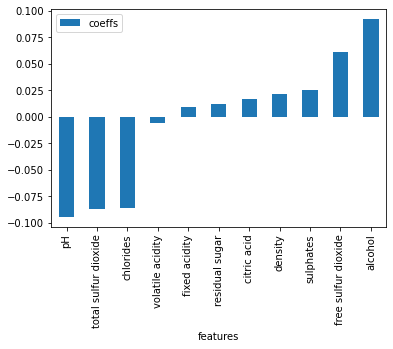

In [45]:
# plot that as a bar chart
feature_imp.plot(kind='bar');

### Evaluate your model

In [46]:
# root mean squared error represents the average error (in $) of our model
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
round(rmse,2)

0.76

In [47]:
# how does this compare to the mean of our training set?
avg_val = round(y_train.mean(),2)
avg_val

5.63

In [48]:
# If we used that as our predictor, then the average error of our model would be:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip=np.sqrt(metrics.mean_squared_error(y_test, comparison_array))
print(round(coin_flip))

1


In [49]:
# R-squared is another important metric
r2=metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.01

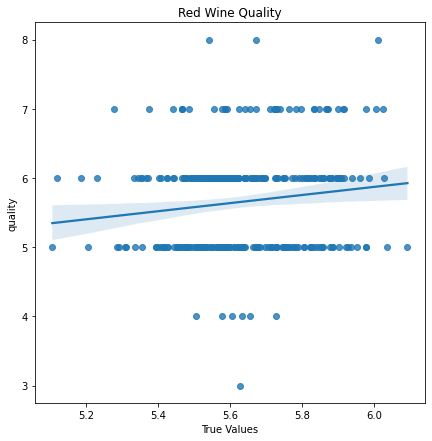

In [51]:
# Visualize our true vs. predicted values
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title('Red Wine Quality')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
fig=sns.regplot(x=y_preds, y=y_test)
plt.show(fig)